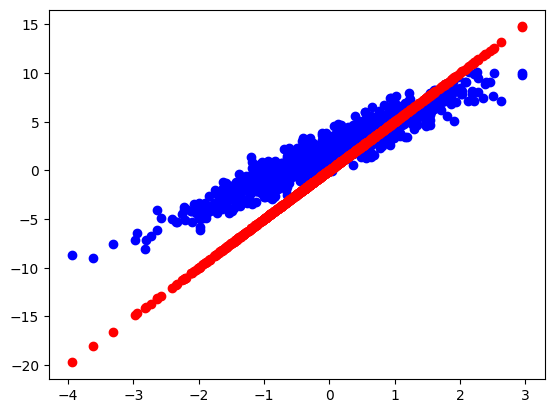

Current loss: 9.313680
Epoch  0: W=5.00 b=0.00, loss=9.31368
Epoch  1: W=4.58 b=0.40, loss=6.26035
Epoch  2: W=4.24 b=0.73, loss=4.32708
Epoch  3: W=3.98 b=0.98, loss=3.10290
Epoch  4: W=3.77 b=1.19, loss=2.32767
Epoch  5: W=3.60 b=1.35, loss=1.83671
Epoch  6: W=3.47 b=1.48, loss=1.52576
Epoch  7: W=3.37 b=1.59, loss=1.32880
Epoch  8: W=3.29 b=1.67, loss=1.20404
Epoch  9: W=3.22 b=1.74, loss=1.12500


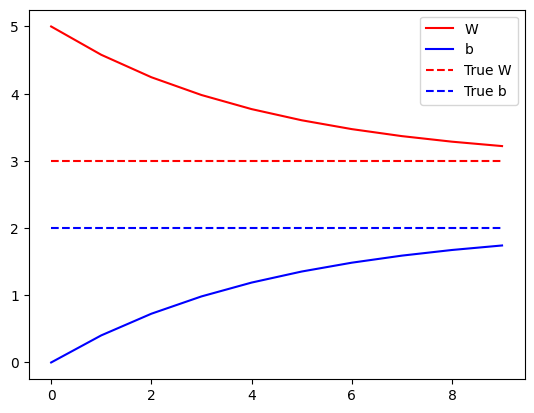

In [3]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")              # Ignore warnings

class Model(object):
  def __init__(self):
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()


def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()





In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import warnings
warnings.filterwarnings("ignore")              # Ignore warnings

data_size = 1000
# 80% of the data is for training.
train_pct = 0.8

train_size = int(data_size * train_pct)

# Create some input data between -1 and 1 and randomize it.
x = np.linspace(-1, 1, data_size)
np.random.shuffle(x)

# Generate the output data.
# y = 0.5x + 2 + noise
y = 0.5 * x + 2 + np.random.normal(0, 0.05, (data_size, ))

# Split into test and train pairs.
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]


model = keras.models.Sequential([
    keras.layers.Dense(16, input_dim=1),
    keras.layers.Dense(1),
])

model.compile(
    loss='mse', # keras.losses.mean_squared_error
    optimizer=keras.optimizers.SGD(lr=0.2),
)

print("Training ... With default parameters, this takes less than 10 seconds.")
training_history = model.fit(
    x_train, # input
    y_train, # output
    batch_size=train_size,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=100,
    validation_data=(x_test, y_test),
)

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With default parameters, this takes less than 10 seconds.
Average test loss:  0.04599103240063414
